In [1]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, optimizers, utils

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'

In [0]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')
y_onehot = np.load(binary_flder + 'y_onehot.npy')

In [24]:
X.shape

(27000, 64, 64, 3)

In [25]:
y.shape

(27000,)

In [0]:
y

array(['Highway', 'Highway', 'Highway', ..., 'PermanentCrop',
       'PermanentCrop', 'PermanentCrop'], dtype='<U20')

In [0]:
y_onehot.shape

(27000, 10)

In [0]:
unique_elements, counts_elements = np.unique(y, return_counts=True)

In [0]:
unique_elements

array(['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
       'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River',
       'SeaLake'], dtype='<U20')

In [0]:
counts_elements

array([3000, 3000, 3000, 2500, 2500, 2000, 2500, 3000, 2500, 3000])

In [0]:
(list(zip(unique_elements, counts_elements)))

[('AnnualCrop', 3000),
 ('Forest', 3000),
 ('HerbaceousVegetation', 3000),
 ('Highway', 2500),
 ('Industrial', 2500),
 ('Pasture', 2000),
 ('PermanentCrop', 2500),
 ('Residential', 3000),
 ('River', 2500),
 ('SeaLake', 3000)]

In [0]:
y_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# split data set into test and training using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X,y_onehot,test_size = 0.2, random_state = 197)

In [0]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (21600, 64, 64, 3)
X_test: (5400, 64, 64, 3)
y_train: (21600, 10)
y_test: (5400, 10)


## GoogLeNet or Inception v1

In [0]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Model
from keras.optimizers import RMSprop,Adam
from keras.optimizers import SGD
import numpy as np

In [0]:
# reshape to be [samples][width][height][channels]
x_train = X_train.reshape((X_train.shape[0], 64, 64, 3)).astype('float32')
x_test = X_test.reshape((X_test.shape[0], 64, 64, 3)).astype('float32')

In [29]:
x_train.shape, x_test.shape

((21600, 64, 64, 3), (5400, 64, 64, 3))

In [0]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [0]:
def inception_module(inputs):
    
    conv1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(inputs)
    conv1 = Conv2D(6, (1,1), activation='relu', border_mode='same')(conv1)

    conv3 = Conv2D(6, (1,1), activation='relu', border_mode='same')(inputs)
    conv3 = Conv2D(6, (3,3), activation='relu', border_mode='same')(conv3)

    conv5 = Conv2D(6, (1,1), activation='relu', border_mode='same')(inputs)
    conv5 = Conv2D(6, (5,5), activation='relu', border_mode='same')(conv5)
    
    x = concatenate([conv1, conv3, conv5], axis=3)
    return x

In [0]:
inputs = Input(x_train.shape[1:])

x = inception_module(inputs)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_incep = Model(input=inputs, output=predictions)
print (model_incep.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 64, 64, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 64, 64, 6)    24          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 64, 64, 6)    24          input_4[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (1, 1), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (1, 1), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (1, 1), activation="relu", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu", padding="same")`
  # Remove the CWD from 

In [0]:
print (model_incep.summary())

In [0]:
# Compile model
opt = SGD(lr=0.01, momentum=0.9)
model_incep.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit the model
hist_inception = model_incep.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=10, batch_size=32, verbose=2)

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
 - 12s - loss: 1.7929 - accuracy: 0.2976 - val_loss: 1.5514 - val_accuracy: 0.3656
Epoch 2/10
 - 5s - loss: 1.5414 - accuracy: 0.4217 - val_loss: 1.3990 - val_accuracy: 0.4422
Epoch 3/10
 - 5s - loss: 1.3846 - accuracy: 0.4796 - val_loss: 1.2631 - val_accuracy: 0.5039
Epoch 4/10
 - 5s - loss: 1.2383 - accuracy: 0.5394 - val_loss: 1.2848 - val_accuracy: 0.5609
Epoch 5/10
 - 5s - loss: 1.2086 - accuracy: 0.5571 - val_loss: 1.3071 - val_accuracy: 0.5159
Epoch 6/10
 - 5s - loss: 1.2081 - accuracy: 0.5633 - val_loss: 1.2993 - val_accuracy: 0.5187
Epoch 7/10
 - 5s - loss: 1.0700 - accuracy: 0.6130 - val_loss: 1.0881 - val_accuracy: 0.5902
Epoch 8/10
 - 5s - loss: 0.9373 - accuracy: 0.6597 - val_loss: 1.0670 - val_accuracy: 0.6304
Epoch 9/10
 - 5s - loss: 0.8676 - accuracy: 0.6849 - val_loss: 1.0649 - val_accuracy: 0.6485
Epoch 10/10
 - 5s - loss: 0.7662 - accuracy: 0.7243 - val_loss: 1.0308 - val_accuracy: 0.6544


In [0]:
# Evaluation of the model
scores = model_incep.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[0],'\nAccuracy: ', scores[1]*100)

5400/5400 [==============================] - 1s 129us/step
Loss:  1.0308016843265957 
Accuracy:  65.44444561004639


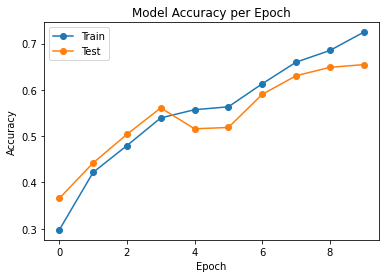

In [0]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(hist_inception.history['accuracy'],marker = 'o')
plt.plot(hist_inception.history['val_accuracy'], marker = 'o')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

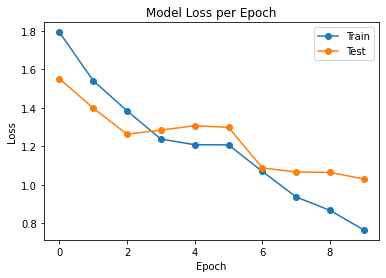

In [0]:
plt.plot(hist_inception.history['loss'],marker = 'o')
plt.plot(hist_inception.history['val_loss'], marker = 'o')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## For better performance

In [0]:
def inception_module1(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
 
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)

    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out

In [0]:
# define model input
visible = Input(x_train.shape[1:])
layer = inception_module1(visible, 128, 128, 192, 32, 96, 64)
x = AveragePooling2D()(layer)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
# create model
model_inception = Model(inputs=visible, outputs=outputs)
# summarize model
print (model_inception.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 64, 64, 128)  512         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 64, 64, 32)   128         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 64, 64, 3)    0           input_3[0][0]                    
____________________________________________________________________________________________

In [0]:
# Compile model
opt = SGD(lr=0.01, momentum=0.9)
model_inception.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit the model
hist_inception1 = model_inception.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=10, batch_size=32, verbose=2)

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
 - 27s - loss: 1.4923 - accuracy: 0.4486 - val_loss: 1.2482 - val_accuracy: 0.5385
Epoch 2/10
 - 27s - loss: 1.2541 - accuracy: 0.5398 - val_loss: 1.2045 - val_accuracy: 0.5526
Epoch 3/10
 - 27s - loss: 1.1341 - accuracy: 0.5802 - val_loss: 1.0633 - val_accuracy: 0.6026
Epoch 4/10
 - 27s - loss: 1.0549 - accuracy: 0.6165 - val_loss: 1.0637 - val_accuracy: 0.5970
Epoch 5/10
 - 27s - loss: 0.9299 - accuracy: 0.6643 - val_loss: 1.1082 - val_accuracy: 0.6072
Epoch 6/10
 - 27s - loss: 0.8299 - accuracy: 0.6985 - val_loss: 0.8464 - val_accuracy: 0.6904
Epoch 7/10
 - 27s - loss: 0.7296 - accuracy: 0.7406 - val_loss: 0.8314 - val_accuracy: 0.7004
Epoch 8/10
 - 27s - loss: 0.6666 - accuracy: 0.7575 - val_loss: 1.0537 - val_accuracy: 0.6437
Epoch 9/10
 - 27s - loss: 0.5641 - accuracy: 0.7944 - val_loss: 0.8818 - val_accuracy: 0.7039
Epoch 10/10
 - 27s - loss: 0.4810 - accuracy: 0.8278 - val_loss: 0.7990 - val_accuracy: 0.7404


In [0]:
# Evaluation of the model
scores = model_inception.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[0],'\nAccuracy: ', scores[1]*100)

5400/5400 [==============================] - 3s 511us/step
Loss:  0.7990183266003926 
Accuracy:  74.03703927993774


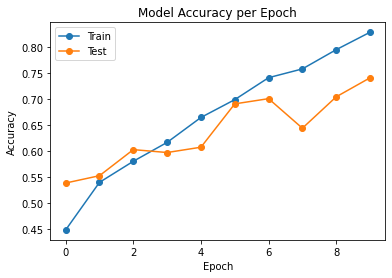

In [0]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(hist_inception1.history['accuracy'],marker = 'o')
plt.plot(hist_inception1.history['val_accuracy'], marker = 'o')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

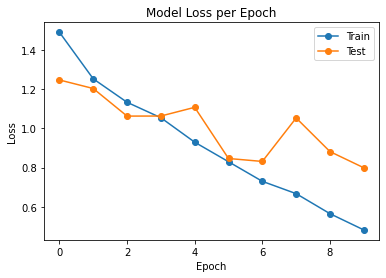

In [0]:
plt.plot(hist_inception1.history['loss'],marker = 'o')
plt.plot(hist_inception1.history['val_loss'], marker = 'o')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [0]:
# Fit the model
hist_inception2 = model_inception.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=150, batch_size=128, verbose=2)

Train on 21600 samples, validate on 5400 samples
Epoch 1/150
 - 23s - loss: 0.2535 - accuracy: 0.9110 - val_loss: 0.8579 - val_accuracy: 0.7596
Epoch 2/150
 - 23s - loss: 0.1841 - accuracy: 0.9398 - val_loss: 0.8795 - val_accuracy: 0.7700
Epoch 3/150
 - 23s - loss: 0.1549 - accuracy: 0.9490 - val_loss: 0.8984 - val_accuracy: 0.7663
Epoch 4/150
 - 23s - loss: 0.1256 - accuracy: 0.9617 - val_loss: 0.9815 - val_accuracy: 0.7681
Epoch 5/150
 - 23s - loss: 0.1116 - accuracy: 0.9653 - val_loss: 1.0086 - val_accuracy: 0.7641
Epoch 6/150
 - 23s - loss: 0.0903 - accuracy: 0.9730 - val_loss: 1.0332 - val_accuracy: 0.7776
Epoch 7/150
 - 23s - loss: 0.0742 - accuracy: 0.9793 - val_loss: 1.0702 - val_accuracy: 0.7730
Epoch 8/150
 - 23s - loss: 0.0635 - accuracy: 0.9827 - val_loss: 1.1112 - val_accuracy: 0.7709
Epoch 9/150
 - 23s - loss: 0.0546 - accuracy: 0.9857 - val_loss: 1.1881 - val_accuracy: 0.7685
Epoch 10/150
 - 23s - loss: 0.0439 - accuracy: 0.9890 - val_loss: 1.2287 - val_accuracy: 0.7730


In [0]:
# Evaluation of the model
scores = model_inception.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[0],'\nAccuracy: ', scores[1]*100)

5400/5400 [==============================] - 3s 513us/step
Loss:  2.318134325234978 
Accuracy:  76.7037034034729


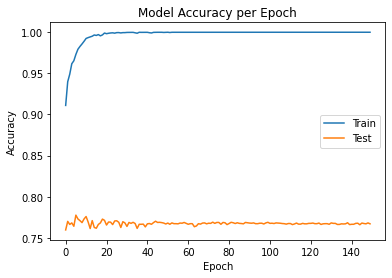

In [0]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(hist_inception2.history['accuracy'])
plt.plot(hist_inception2.history['val_accuracy'])
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

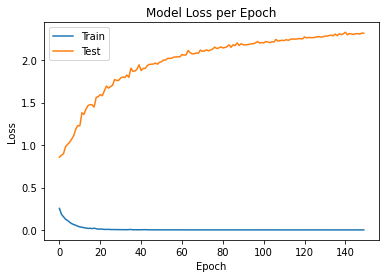

In [0]:
plt.plot(hist_inception2.history['loss'])
plt.plot(hist_inception2.history['val_loss'])
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## For more better performance

In [0]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [0]:
IMAGE_SHAPE = x_train.shape[1:]
CLASS_NUM = y_onehot.shape[1] 

In [0]:
def inception(x, filters):
    # 1x1
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)

    # 1x1->3x3
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path2)
    
    # 1x1->5x5
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path3)

    # 3x3->1x1
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])


In [0]:
def auxiliary(x, name=None):
    layer = AveragePooling2D()(x)
    layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=256, activation='relu')(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=CLASS_NUM, activation='softmax', name=name)(layer)
    return layer

In [0]:
def googlenet():
    layer_in = Input(shape=IMAGE_SHAPE)
    
    # stage-1
    layer = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(layer_in)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    # stage-3
    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary(layer, name='aux1')
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary(layer, name='aux2')
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-5
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    layer = AveragePooling2D()(layer)
    
    # stage-6
    layer = Flatten()(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=256, activation='linear')(layer)
    main = Dense(units=CLASS_NUM, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])
    
    return model

In [36]:
model = googlenet()
print (model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 32, 32, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 16, 16, 64)   0           conv2d_59[0][0]                  
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 16, 16, 64)   256         max_pooling2d_13[0][0]           
____________________________________________________________________________________________

In [0]:
# Compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit the model
hist_inception3 = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=5, batch_size=32, verbose=2)

Epoch 1/5
675/675 - 20s - loss: 4.0820 - main_loss: 1.3957 - aux1_loss: 1.3046 - aux2_loss: 1.3817 - main_accuracy: 0.4803 - aux1_accuracy: 0.5173 - aux2_accuracy: 0.4862 - val_loss: 7.1370 - val_main_loss: 2.3051 - val_aux1_loss: 2.5661 - val_aux2_loss: 2.2658 - val_main_accuracy: 0.3107 - val_aux1_accuracy: 0.3528 - val_aux2_accuracy: 0.3200
Epoch 2/5
675/675 - 19s - loss: 2.7975 - main_loss: 0.9591 - aux1_loss: 0.8958 - aux2_loss: 0.9426 - main_accuracy: 0.6687 - aux1_accuracy: 0.6840 - aux2_accuracy: 0.6749 - val_loss: 2.8704 - val_main_loss: 0.9773 - val_aux1_loss: 0.9419 - val_aux2_loss: 0.9512 - val_main_accuracy: 0.6643 - val_aux1_accuracy: 0.6806 - val_aux2_accuracy: 0.6743
Epoch 3/5
675/675 - 19s - loss: 2.3526 - main_loss: 0.8022 - aux1_loss: 0.7563 - aux2_loss: 0.7941 - main_accuracy: 0.7338 - aux1_accuracy: 0.7450 - aux2_accuracy: 0.7358 - val_loss: 6.8061 - val_main_loss: 2.0966 - val_aux1_loss: 2.4653 - val_aux2_loss: 2.2442 - val_main_accuracy: 0.4850 - val_aux1_accurac

In [0]:
# Evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[1],'\nAccuracy: ', scores[4]*100)
#scores

169/169 [==============================] - 2s 12ms/step - loss: 5.5396 - main_loss: 1.9577 - aux1_loss: 1.7677 - aux2_loss: 1.8142 - main_accuracy: 0.5365 - aux1_accuracy: 0.5533 - aux2_accuracy: 0.5430
Loss:  1.9577065706253052 
Accuracy:  53.6481499671936


In [0]:
hist_inception4 = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=10, batch_size=32, verbose=2)

Epoch 1/10
675/675 - 19s - loss: 1.5246 - main_loss: 0.5168 - aux1_loss: 0.4973 - aux2_loss: 0.5106 - main_accuracy: 0.8327 - aux1_accuracy: 0.8379 - aux2_accuracy: 0.8375 - val_loss: 2.0807 - val_main_loss: 0.7036 - val_aux1_loss: 0.6873 - val_aux2_loss: 0.6897 - val_main_accuracy: 0.7763 - val_aux1_accuracy: 0.7715 - val_aux2_accuracy: 0.7791
Epoch 2/10
675/675 - 19s - loss: 1.3370 - main_loss: 0.4535 - aux1_loss: 0.4354 - aux2_loss: 0.4481 - main_accuracy: 0.8510 - aux1_accuracy: 0.8546 - aux2_accuracy: 0.8539 - val_loss: 2.1930 - val_main_loss: 0.7300 - val_aux1_loss: 0.7431 - val_aux2_loss: 0.7199 - val_main_accuracy: 0.7609 - val_aux1_accuracy: 0.7626 - val_aux2_accuracy: 0.7580
Epoch 3/10
675/675 - 19s - loss: 1.2214 - main_loss: 0.4137 - aux1_loss: 0.3975 - aux2_loss: 0.4102 - main_accuracy: 0.8650 - aux1_accuracy: 0.8681 - aux2_accuracy: 0.8681 - val_loss: 1.0667 - val_main_loss: 0.3649 - val_aux1_loss: 0.3480 - val_aux2_loss: 0.3538 - val_main_accuracy: 0.8848 - val_aux1_accu

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[1],'\nAccuracy: ', scores[4]*100)

169/169 [==============================] - 2s 12ms/step - loss: 2.9103 - main_loss: 0.9877 - aux1_loss: 0.9138 - aux2_loss: 1.0088 - main_accuracy: 0.7394 - aux1_accuracy: 0.7398 - aux2_accuracy: 0.7396
Loss:  0.9876587390899658 
Accuracy:  73.94444346427917


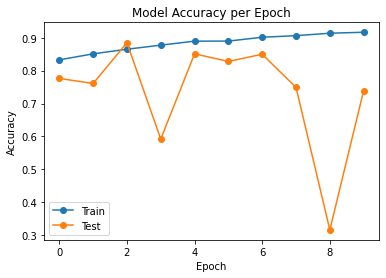

In [0]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(hist_inception4.history['main_accuracy'],marker = 'o')
plt.plot(hist_inception4.history['val_main_accuracy'], marker = 'o')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

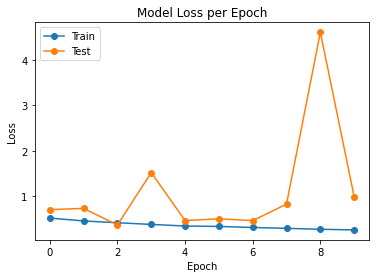

In [0]:
plt.plot(hist_inception4.history['main_loss'],marker = 'o')
plt.plot(hist_inception4.history['val_main_loss'], marker = 'o')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## **Epochs # 100**

In [18]:
hist_inception5 = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=100, batch_size=128, verbose=2)

Epoch 1/100
169/169 - 10s - loss: 3.7222 - main_loss: 1.2808 - aux1_loss: 1.1655 - aux2_loss: 1.2758 - main_accuracy: 0.5231 - aux1_accuracy: 0.5756 - aux2_accuracy: 0.5334 - val_loss: 5.3241 - val_main_loss: 1.7672 - val_aux1_loss: 1.7796 - val_aux2_loss: 1.7772 - val_main_accuracy: 0.3083 - val_aux1_accuracy: 0.3346 - val_aux2_accuracy: 0.3407
Epoch 2/100
169/169 - 9s - loss: 2.3798 - main_loss: 0.8128 - aux1_loss: 0.7561 - aux2_loss: 0.8110 - main_accuracy: 0.7198 - aux1_accuracy: 0.7349 - aux2_accuracy: 0.7213 - val_loss: 9.2556 - val_main_loss: 2.9674 - val_aux1_loss: 3.2571 - val_aux2_loss: 3.0312 - val_main_accuracy: 0.3350 - val_aux1_accuracy: 0.3361 - val_aux2_accuracy: 0.3378
Epoch 3/100
169/169 - 9s - loss: 1.9277 - main_loss: 0.6556 - aux1_loss: 0.6146 - aux2_loss: 0.6574 - main_accuracy: 0.7784 - aux1_accuracy: 0.7878 - aux2_accuracy: 0.7794 - val_loss: 10.7632 - val_main_loss: 3.4203 - val_aux1_loss: 3.7462 - val_aux2_loss: 3.5967 - val_main_accuracy: 0.3328 - val_aux1_ac

In [19]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[1],'\nAccuracy: ', scores[4]*100)

169/169 [==============================] - 2s 12ms/step - loss: 5.3150 - main_loss: 1.7475 - aux1_loss: 1.7534 - aux2_loss: 1.8141 - main_accuracy: 0.7531 - aux1_accuracy: 0.7541 - aux2_accuracy: 0.7507
Loss:  1.747546911239624 
Accuracy:  75.31481385231018


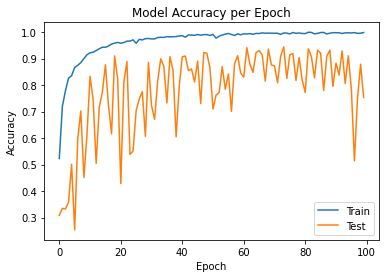

In [20]:
plt.plot(hist_inception5.history['main_accuracy'])
plt.plot(hist_inception5.history['val_main_accuracy'])
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

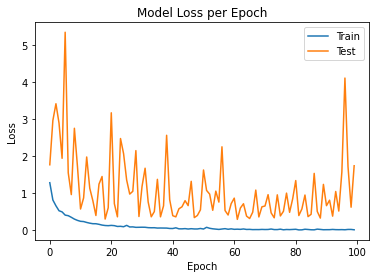

In [21]:
plt.plot(hist_inception5.history['main_loss'])
plt.plot(hist_inception5.history['val_main_loss'])
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## **Epochs # 150**

In [38]:
hist_inception6 = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=150, batch_size=128, verbose=2)

Epoch 1/150
169/169 - 9s - loss: 3.8822 - main_loss: 1.3339 - aux1_loss: 1.2186 - aux2_loss: 1.3297 - main_accuracy: 0.5006 - aux1_accuracy: 0.5500 - aux2_accuracy: 0.5063 - val_loss: 5.2765 - val_main_loss: 1.7627 - val_aux1_loss: 1.7671 - val_aux2_loss: 1.7467 - val_main_accuracy: 0.4087 - val_aux1_accuracy: 0.4215 - val_aux2_accuracy: 0.4311
Epoch 2/150
169/169 - 9s - loss: 2.3993 - main_loss: 0.8222 - aux1_loss: 0.7590 - aux2_loss: 0.8180 - main_accuracy: 0.7173 - aux1_accuracy: 0.7323 - aux2_accuracy: 0.7190 - val_loss: 6.9163 - val_main_loss: 2.3217 - val_aux1_loss: 2.2937 - val_aux2_loss: 2.3009 - val_main_accuracy: 0.3531 - val_aux1_accuracy: 0.3661 - val_aux2_accuracy: 0.3594
Epoch 3/150
169/169 - 9s - loss: 1.9350 - main_loss: 0.6575 - aux1_loss: 0.6241 - aux2_loss: 0.6534 - main_accuracy: 0.7730 - aux1_accuracy: 0.7837 - aux2_accuracy: 0.7749 - val_loss: 5.8694 - val_main_loss: 2.0770 - val_aux1_loss: 1.8065 - val_aux2_loss: 1.9859 - val_main_accuracy: 0.4431 - val_aux1_accu

In [40]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[1],'\nAccuracy: ', scores[4]*100)

169/169 [==============================] - 2s 12ms/step - loss: 3.7097 - main_loss: 1.1319 - aux1_loss: 1.3662 - aux2_loss: 1.2117 - main_accuracy: 0.7659 - aux1_accuracy: 0.7581 - aux2_accuracy: 0.7635
Loss:  1.1318641901016235 
Accuracy:  76.5925943851471


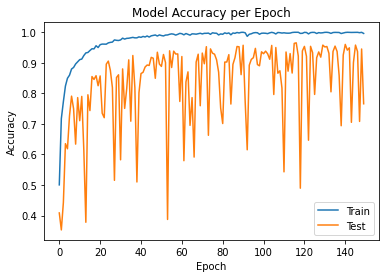

In [41]:
plt.plot(hist_inception6.history['main_accuracy'])
plt.plot(hist_inception6.history['val_main_accuracy'])
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

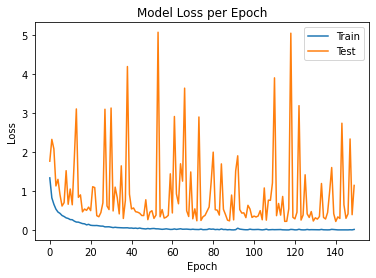

In [42]:
plt.plot(hist_inception6.history['main_loss'])
plt.plot(hist_inception6.history['val_main_loss'])
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

## **Epochs # 50**

In [0]:
hist_inception7 = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=50, batch_size=128, verbose=2)

Epoch 1/50
169/169 - 9s - loss: 3.7677 - main_loss: 1.3046 - aux1_loss: 1.1805 - aux2_loss: 1.2825 - main_accuracy: 0.5166 - aux1_accuracy: 0.5715 - aux2_accuracy: 0.5336 - val_loss: 5.4210 - val_main_loss: 1.8067 - val_aux1_loss: 1.7747 - val_aux2_loss: 1.8396 - val_main_accuracy: 0.3950 - val_aux1_accuracy: 0.3517 - val_aux2_accuracy: 0.3822
Epoch 2/50
169/169 - 9s - loss: 2.3515 - main_loss: 0.8016 - aux1_loss: 0.7526 - aux2_loss: 0.7973 - main_accuracy: 0.7261 - aux1_accuracy: 0.7401 - aux2_accuracy: 0.7265 - val_loss: 13.1225 - val_main_loss: 4.2209 - val_aux1_loss: 4.9328 - val_aux2_loss: 3.9689 - val_main_accuracy: 0.2450 - val_aux1_accuracy: 0.2335 - val_aux2_accuracy: 0.2517
Epoch 3/50
169/169 - 9s - loss: 1.9828 - main_loss: 0.6755 - aux1_loss: 0.6379 - aux2_loss: 0.6693 - main_accuracy: 0.7706 - aux1_accuracy: 0.7798 - aux2_accuracy: 0.7747 - val_loss: 15.1829 - val_main_loss: 4.7912 - val_aux1_loss: 5.5050 - val_aux2_loss: 4.8867 - val_main_accuracy: 0.3013 - val_aux1_accur

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[1],'\nAccuracy: ', scores[4]*100)

169/169 [==============================] - 2s 12ms/step - loss: 6.4725 - main_loss: 2.0179 - aux1_loss: 2.3581 - aux2_loss: 2.0965 - main_accuracy: 0.6528 - aux1_accuracy: 0.6498 - aux2_accuracy: 0.6530
Loss:  2.017895460128784 
Accuracy:  65.27777910232544


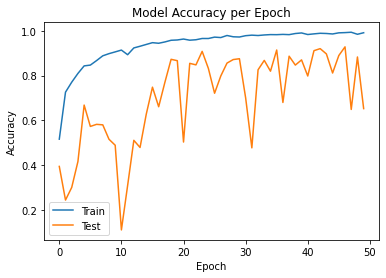

In [0]:
plt.plot(hist_inception7.history['main_accuracy'])
plt.plot(hist_inception7.history['val_main_accuracy'])
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

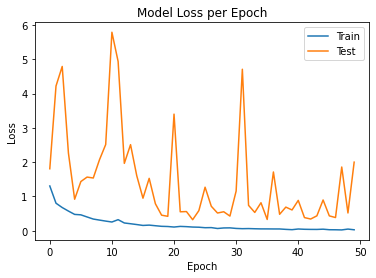

In [0]:
plt.plot(hist_inception7.history['main_loss'])
plt.plot(hist_inception7.history['val_main_loss'])
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()